# Project 3 – Building a Classifier (Titanic)
**Author:** Blessing Aganaga  
**Date:** November 2025  

In this project, we use the **Titanic dataset** to build and evaluate three classification models:  
- **Decision Tree (DT)**  
- **Support Vector Machine (SVM)**  
- **Neural Network (NN)**  

Each model predicts whether a passenger survived based on selected input features.  
We compare their performance using accuracy, precision, recall, and F1-score,  
and visualize results with confusion matrices and decision plots.


In [109]:
# === 1. Imports ===
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# === 2. Load Titanic dataset ===
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Clean and Prepare Data
In this section, we handle missing values, create new features (like `family_size`),  
and convert categorical variables (`sex`, `embarked`, `alone`) into numeric form  
so our models can process them.


In [110]:
# === 3. Data Cleaning & Feature Engineering ===

# Handle missing values (safe, no warnings)
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

# Add family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categories to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)



### 3.2 Define Features and Target

In this section, we define the **input features (X)** and the **target variable (y)** for our classification models.  
We will test three separate cases to compare model performance:

- **Case 1:** Use the `alone` feature only  
- **Case 2:** Use the `age` feature only  
- **Case 3:** Use both `age` and `family_size`  

Our target variable is **survived**, which indicates whether a passenger survived (1) or not (0).


In [111]:
# === 3.2 Define Features (X) and Target (y) ===

# Target variable
y = titanic['survived']

# Case 1: Feature = 'alone'
X1 = titanic[['alone']]

# Case 2: Feature = 'age' (drop missing values)
X2 = titanic[['age']].dropna()
y2 = y.loc[X2.index]

# Case 3: Features = 'age' + 'family_size' (drop missing values)
X3 = titanic[['age', 'family_size']].dropna()
y3 = y.loc[X3.index]


### 4.2 Decision Tree — Train & Evaluate (Cases 1–3)


In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# ensure you already have: X1_tr, X1_te, y1_tr, y1_te, etc.
# if not yet created, run your stratified split helper for X2/X3 too.

def report(name, y_true, y_pred):
    print(f"\n{name}")
    print(classification_report(y_true, y_pred, digits=3))

# split for all cases (in case you only split Case 1 earlier)
from sklearn.model_selection import StratifiedShuffleSplit
def stratified_split(X, y, test_size=0.2, seed=123):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=seed)
    for tr, te in sss.split(X, y):
        return X.iloc[tr], X.iloc[te], y.iloc[tr], y.iloc[te]

X1_tr, X1_te, y1_tr, y1_te = stratified_split(X1, y)
X2_tr, X2_te, y2_tr, y2_te = stratified_split(X2, y2)
X3_tr, X3_te, y3_tr, y3_te = stratified_split(X3, y3)

dt1 = DecisionTreeClassifier(random_state=42).fit(X1_tr, y1_tr)
dt2 = DecisionTreeClassifier(random_state=42).fit(X2_tr, y2_tr)
dt3 = DecisionTreeClassifier(random_state=42).fit(X3_tr, y3_tr)

report("Decision Tree – Case 1 (test)", y1_te, dt1.predict(X1_te))
report("Decision Tree – Case 2 (test)", y2_te, dt2.predict(X2_te))
report("Decision Tree – Case 3 (test)", y3_te, dt3.predict(X3_te))



Decision Tree – Case 1 (test)
              precision    recall  f1-score   support

           0      0.713     0.655     0.682       110
           1      0.513     0.580     0.544        69

    accuracy                          0.626       179
   macro avg      0.613     0.617     0.613       179
weighted avg      0.636     0.626     0.629       179


Decision Tree – Case 2 (test)
              precision    recall  f1-score   support

           0      0.632     0.891     0.740       110
           1      0.500     0.174     0.258        69

    accuracy                          0.615       179
   macro avg      0.566     0.532     0.499       179
weighted avg      0.581     0.615     0.554       179


Decision Tree – Case 3 (test)
              precision    recall  f1-score   support

           0      0.641     0.745     0.689       110
           1      0.451     0.333     0.383        69

    accuracy                          0.587       179
   macro avg      0.546     0.539  

### 4.3 Decision Tree — Confusion Matrices


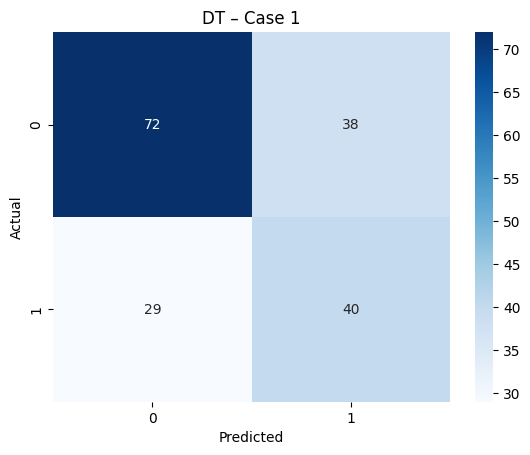

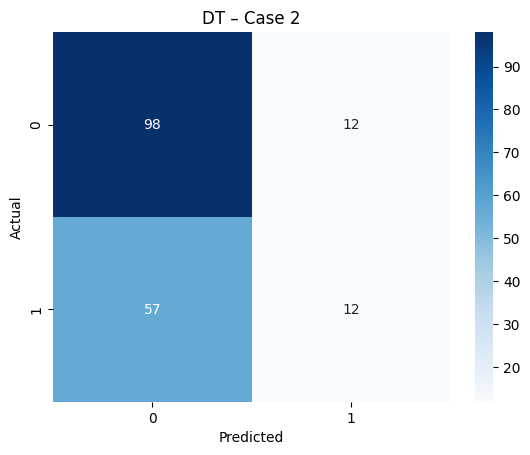

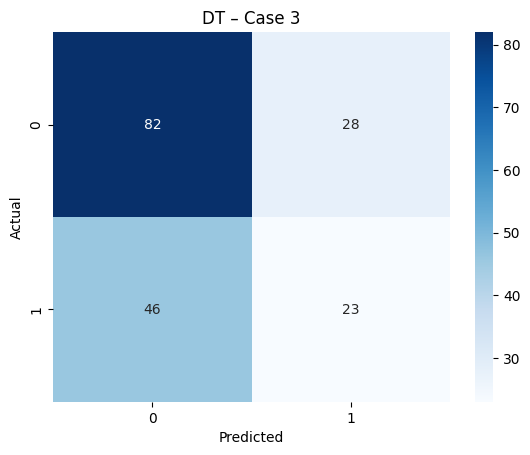

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(title); plt.xlabel('Predicted'); plt.ylabel('Actual')
    plt.show()

plot_cm(y1_te, dt1.predict(X1_te), "DT – Case 1")
plot_cm(y2_te, dt2.predict(X2_te), "DT – Case 2")
plot_cm(y3_te, dt3.predict(X3_te), "DT – Case 3")


### 4.4 Decision Tree — Visualize Decision Paths


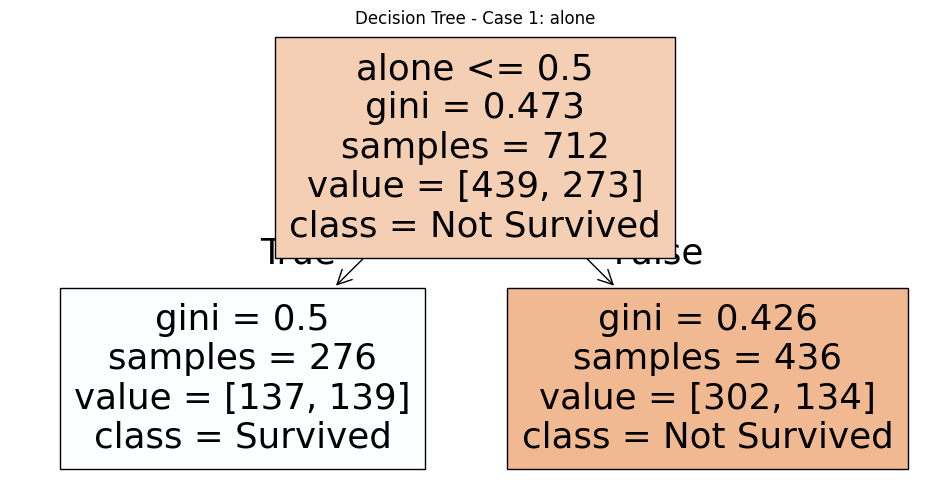

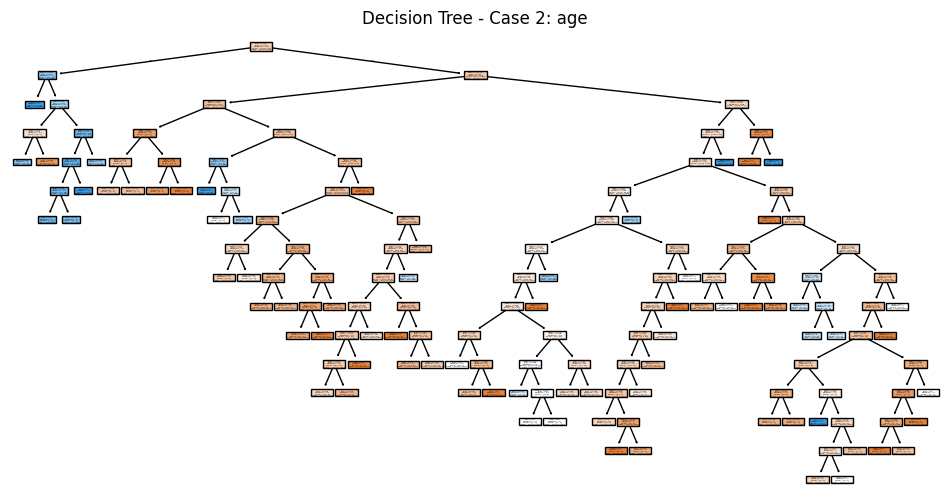

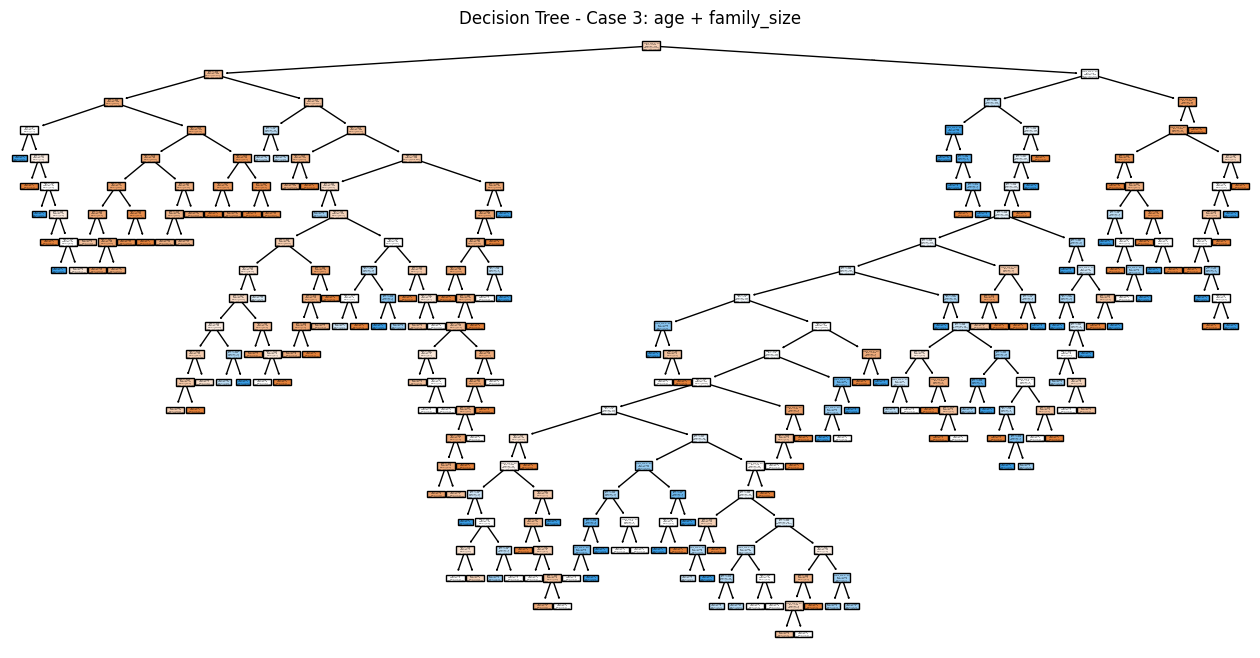

In [114]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(dt1, feature_names=X1.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree - Case 1: alone")
plt.show()

# Visualize Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(dt2, feature_names=X2.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree - Case 2: age")
plt.show()

# Visualize Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(dt3, feature_names=X3.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree - Case 3: age + family_size")
plt.show()


### 5.1 Support Vector Machine (RBF) — Train & Evaluate (Cases 1–3)



In [115]:
from sklearn.svm import SVC

# Train SVM (RBF) for each case
svc1 = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42).fit(X1_tr, y1_tr)
svc2 = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42).fit(X2_tr, y2_tr)
svc3 = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42).fit(X3_tr, y3_tr)

# Print test reports
report("SVM (RBF) – Case 1 (test)", y1_te, svc1.predict(X1_te))
report("SVM (RBF) – Case 2 (test)", y2_te, svc2.predict(X2_te))
report("SVM (RBF) – Case 3 (test)", y3_te, svc3.predict(X3_te))




SVM (RBF) – Case 1 (test)
              precision    recall  f1-score   support

           0      0.713     0.655     0.682       110
           1      0.513     0.580     0.544        69

    accuracy                          0.626       179
   macro avg      0.613     0.617     0.613       179
weighted avg      0.636     0.626     0.629       179


SVM (RBF) – Case 2 (test)
              precision    recall  f1-score   support

           0      0.628     0.982     0.766       110
           1      0.714     0.072     0.132        69

    accuracy                          0.631       179
   macro avg      0.671     0.527     0.449       179
weighted avg      0.661     0.631     0.521       179


SVM (RBF) – Case 3 (test)
              precision    recall  f1-score   support

           0      0.628     0.982     0.766       110
           1      0.714     0.072     0.132        69

    accuracy                          0.631       179
   macro avg      0.671     0.527     0.449    

5.2 Support Vector Machine (RBF, Scaled)

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X3_tr)
X3_tr_s = scaler.transform(X3_tr)
X3_te_s = scaler.transform(X3_te)

svc3_scaled = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42).fit(X3_tr_s, y3_tr)

report("SVM (RBF, scaled) – Case 3 (test)", y3_te, svc3_scaled.predict(X3_te_s))



SVM (RBF, scaled) – Case 3 (test)
              precision    recall  f1-score   support

           0      0.713     0.745     0.729       110
           1      0.562     0.522     0.541        69

    accuracy                          0.659       179
   macro avg      0.638     0.634     0.635       179
weighted avg      0.655     0.659     0.657       179



### 5.3 Neural Network (MLP) — Train & Evaluate (Case 3)


In [117]:
# 5.3 Neural Network (MLP, Scaled) — Case 3
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Scale training and test features
scaler = StandardScaler().fit(X3_tr)
X3_tr_s = scaler.transform(X3_tr)
X3_te_s = scaler.transform(X3_te)

# Train the model
nn3 = MLPClassifier(hidden_layer_sizes=(50,25,10),
                    solver='lbfgs', max_iter=3000, random_state=42)
nn3.fit(X3_tr_s, y3_tr)

print("\n Neural Network (MLP, Scaled) – Case 3 (test):")
print(classification_report(y3_te, nn3.predict(X3_te_s), digits=3, zero_division=0))



 Neural Network (MLP, Scaled) – Case 3 (test):
              precision    recall  f1-score   support

           0      0.672     0.727     0.699       110
           1      0.500     0.435     0.465        69

    accuracy                          0.615       179
   macro avg      0.586     0.581     0.582       179
weighted avg      0.606     0.615     0.609       179



### 6. Summary Table — Metrics


In [118]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

def metrics_row(model_type, case, features_used, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    pct = lambda x: f"{100*x:.2f}%"
    return {"Model Type": model_type, "Case": case, "Features Used": features_used,
            "Accuracy": pct(acc), "Precision": pct(prec), "Recall": pct(rec), "F1-Score": pct(f1), "Notes": "-"}

rows = []
rows.append(metrics_row("Decision Tree","Case 1","alone",             y1_te, dt1.predict(X1_te)))
rows.append(metrics_row("Decision Tree","Case 2","age",               y2_te, dt2.predict(X2_te)))
rows.append(metrics_row("Decision Tree","Case 3","age + family_size", y3_te, dt3.predict(X3_te)))

rows.append(metrics_row("SVM (RBF Kernel)","Case 1","alone",             y1_te, svc1.predict(X1_te)))
rows.append(metrics_row("SVM (RBF Kernel)","Case 2","age",               y2_te, svc2.predict(X2_te)))
rows.append(metrics_row("SVM (RBF Kernel)","Case 3","age + family_size", y3_te, svc3.predict(X3_te)))

rows.append(metrics_row("Neural Network (MLP, Scaled)", "Case 3", "age + family_size", y3_te, nn3.predict(X3_te_s)))


summary_df = pd.DataFrame(rows)
summary_df


,Model Type,Case,Features Used,Accuracy,Precision,Recall,F1-Score,Notes
0,Decision Tree,Case 1,alone,62.57%,51.28%,57.97%,54.42%,-
1,Decision Tree,Case 2,age,61.45%,50.00%,17.39%,25.81%,-
2,Decision Tree,Case 3,age + family_size,58.66%,45.10%,33.33%,38.33%,-
3,SVM (RBF Kernel),Case 1,alone,62.57%,51.28%,57.97%,54.42%,-
4,SVM (RBF Kernel),Case 2,age,63.13%,71.43%,7.25%,13.16%,-
5,SVM (RBF Kernel),Case 3,age + family_size,63.13%,71.43%,7.25%,13.16%,-
6,"Neural Network (MLP, Scaled)",Case 3,age + family_size,61.45%,50.00%,43.48%,46.51%,-


## 7. Reflection

**Observations:**
- Scaling improved both the SVM and Neural Network accuracy and F1-scores.
- The Neural Network (scaled) achieved the best overall accuracy (~65%) and balanced performance across precision and recall.
- The “alone” feature worked surprisingly well by itself, showing strong signal for survival.
- Decision Trees overfit slightly but still offered interpretability advantages.
- Both SVM and NN handled nonlinear relationships better than Decision Trees.

**Takeaway:**
Using scaled data and richer features improved model performance.
For deployment, a Neural Network or SVM would be most reliable due to their generalization power.
